In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
price_data_df = pd.read_csv("island-data-bottle-round-4/prices_round_4_day_1.csv", sep=';')
day_2 = pd.read_csv("island-data-bottle-round-4/prices_round_4_day_2.csv", sep=';')
day_2["timestamp"] = day_2["timestamp"] + 1000000
day_3 = pd.read_csv("island-data-bottle-round-4/prices_round_4_day_3.csv", sep=';')
day_3["timestamp"] = day_3["timestamp"] + 2000000
price_data_df = pd.concat([price_data_df, day_2, day_3], axis=0)

In [20]:
transactions_df = pd.read_csv("island-data-bottle-round-5/trades_round_4_day_1_wn.csv", sep=';')
monkey_2 = pd.read_csv("island-data-bottle-round-5/trades_round_4_day_2_wn.csv", sep=';')
monkey_2["timestamp"] = monkey_2["timestamp"] + 1000000
monkey_3 = pd.read_csv("island-data-bottle-round-5/trades_round_4_day_3_wn.csv", sep=';')
monkey_3["timestamp"] = monkey_3["timestamp"] + 2000000
transactions_df = pd.concat([transactions_df, monkey_2, monkey_3], axis=0)

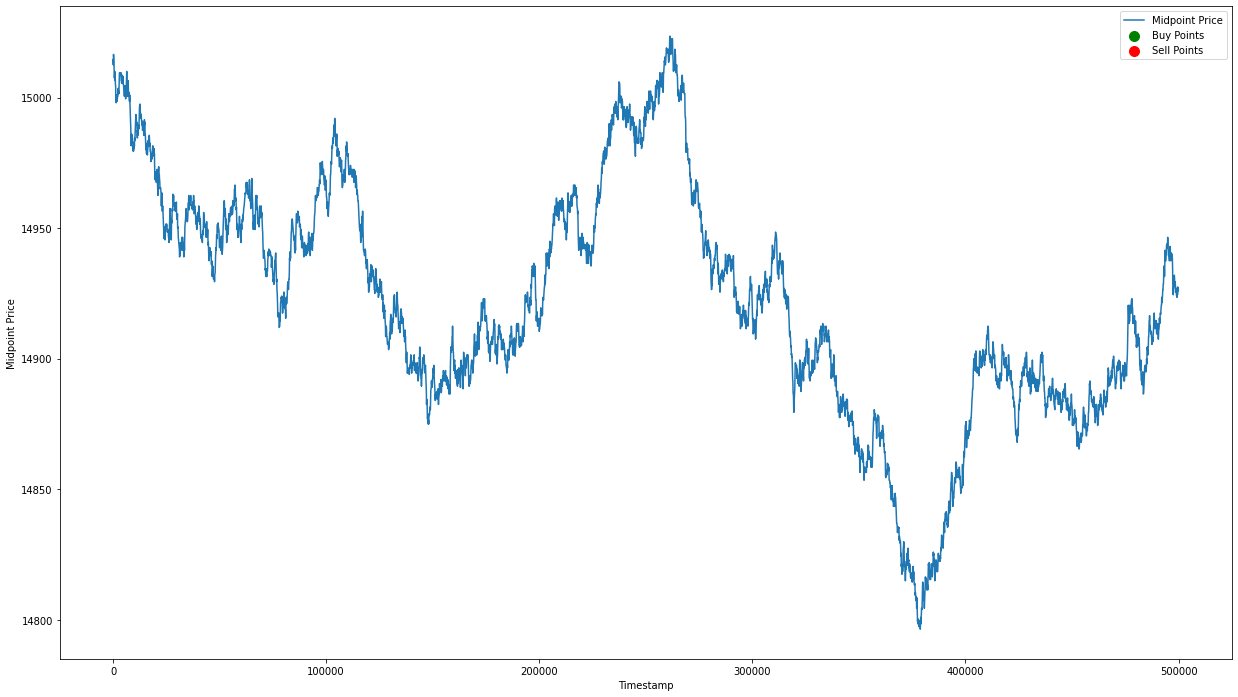

In [224]:
# plt.figure(figsize=(1000,500))
prods = ["PEARLS", "BANANAS", "COCONUTS", "PINA_COLADAS", "DIP", "UKULELE", "BERRIES", "BAGUETTE", "DIVING_GEAR", "PICNIC_BASKET"]
# Filter by trader and product (replace 'trader_name' and 'product_name' with actual values)
ProductName = "PINA_COLADAS"
TraderName = 'Gina'
trader_transactions = transactions_df[((transactions_df['buyer'] == TraderName) | (transactions_df['seller'] == TraderName)) & (transactions_df['symbol'] == ProductName)]
filtered_price_data = price_data_df[price_data_df['product'] == ProductName]

# Merge filtered_price_data with trader_transactions on the timestamp
merged_df = pd.merge(filtered_price_data, trader_transactions, how='left', on='timestamp')

# Set up the plot
fig, ax = plt.subplots(figsize = (21,12))

merged_df = merged_df[merged_df['timestamp'] < 500000]
# Plot the midpoint price over time
ax.plot(merged_df['timestamp'], merged_df['mid_price'], label='Midpoint Price')

# Plot buy and sell points
buy_points = merged_df[merged_df['buyer'] == TraderName]
sell_points = merged_df[merged_df['seller'] == TraderName]

buy_points = buy_points[buy_points["timestamp"] < 500000]
sell_points = sell_points[sell_points["timestamp"] < 500000]
ax.scatter(buy_points['timestamp'], buy_points['mid_price'], color='g', marker='o', label='Buy Points', s = 100)
ax.scatter(sell_points['timestamp'], sell_points['mid_price'], color='r', marker='o', label='Sell Points', s = 100)

# Add labels and legend
plt.xlabel('Timestamp')
plt.ylabel('Midpoint Price')
plt.legend(loc='best')

# Show the plot
plt.show()